# Classification ML

1. Naive Bayes
2. Decision Tree
3. Random Forest
4. Support Vector Machine

keempat algoritma machine learning diatas memiliki approach yang berbeda untuk mengklasifikasi data menjadi kategori masing-masing.

untuk membuat model Machine Learning kita masih menggunakan teknik yang sama:
1. siapkan data
2. rapikan data, eksplorasi data
3. memilih algoritma dan melatih model
4. evaluasi model
5. tuning

kita mulai dari langkah pertama

## Naive Bayes

menggunakan frekuensi, likelihood, dan menghitung probabilitas untuk memprediksi sebuah data masuk kategori mana

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# menggunakan contoh data untuk membuat model classification menggunakan algoritma Naive Bayes
weather = [
    'Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy'
]

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df = pd.DataFrame({'weather':weather, 'temp':temp, 'play':play})
df

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [3]:
# karena data bersifat text, kita lakukan encoding
le = LabelEncoder()

le.fit(weather)
print("weather", le.classes_)
weather_en = le.transform(weather)

le.fit(temp)
print("temp", le.classes_)
temp_en = le.transform(temp)

le.fit(play)
print("play", le.classes_)
play_en = le.transform(play)

df_en = pd.DataFrame({'weather':weather_en, 'temp':temp_en, 'play':play_en})
df_en

weather ['Overcast' 'Rainy' 'Sunny']
temp ['Cool' 'Hot' 'Mild']
play ['No' 'Yes']


,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [ ]:
# pisahin data menjadi fitur dan target

X = df_en[['weather', 'temp']]
y = df_en['play']

In [ ]:
# kita buat model ML tipe Classification dengan algoritma Naive Bayes

model_nb = GaussianNB()
model_nb.fit(X, y)

GaussianNB()

In [ ]:
# evaluasi model tipe Classification

y_pred = model_nb.predict(X)

df_banding = pd.DataFrame({"asli":y, "prediksi":y_pred})
df_banding

,asli,prediksi
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1
7,0,0
8,1,0
9,1,1


In [ ]:
# optional, untuk membuat confusion matrix yang visual

def drawConfusionMatrix(cm, n, title="Confusion Matrix"):
    fig, ax = plt.subplots(figsize=(n, n))
    ax.imshow(cm)
    ax.grid(False)

    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("Predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("Actual")
    ax.set_title(title)

    ax.set_ylim(n-0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

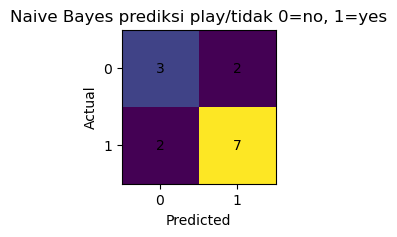

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [ ]:
y_pred = model_nb.predict(X)

drawConfusionMatrix(confusion_matrix(y, y_pred), 2, title="Naive Bayes prediksi play/tidak 0=no, 1=yes")
print(classification_report(y, y_pred))

hasil diatas menunjukkan bahwa model naive bayes yang kita buat berhasil memprediksi 10 secara akurat, dan 4 salah prediksi.

berikutnya kita bisa coba dengan data yang lebih complex, misalnya dataset tentang stroke. Kita bisa buat model untuk prediksi apakah seseorang memiliki penyakit stroke/ tidak dari fiturnya umur, hipertensi, gula darah, dan BMI.

In [ ]:
# 1. import data
df_stroke = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/stroke.csv")
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# 2. data cleaning

df_stroke2 = df_stroke.dropna()
df_stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
# pisahin fitur dan target

X = df_stroke2[['age', 'hypertension', 'avg_glucose_level', 'bmi']]
y = df_stroke2['stroke']

In [ ]:
# pisahin menjadi training dan testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

print(X_train.shape, X_test.shape)
print(len(y_train), len(y_test))

(3681, 4) (1228, 4)
3681 1228


In [ ]:
# 3. buat model Naive Bayes
model_nb_stroke = GaussianNB()
model_nb_stroke.fit(X_train, y_train)

GaussianNB()

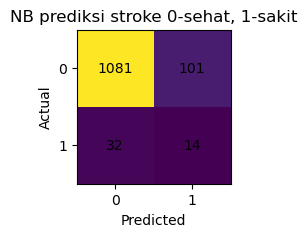

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1182
           1       0.12      0.30      0.17        46

    accuracy                           0.89      1228
   macro avg       0.55      0.61      0.56      1228
weighted avg       0.94      0.89      0.91      1228



In [ ]:
# 4. evaluasi model

y_pred = model_nb_stroke.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
drawConfusionMatrix(cm, 2, "NB prediksi stroke 0-sehat, 1-sakit")
print(classification_report(y_test, y_pred))

bisa diperhatikan bahwa model Naive Bayes yang kita buat hampir tidak bisa memprediksi orang sakit. Ini terjadi karena banyaknya data orang sehat dibandingkan data orang sakit. Modelnya menjadi bias dan condong menebak seseorang sehat karena kemungkinan orang sehat di dataset jauh lebih tinggi.

Walaupun accuracy ada di 0.89 (89%) model ini tetap kurang baik, karena precision prediksi orang sakit hanya di 12% - model hampir tidak bisa memprediksi orang sakit sama sekali.

## Decision Tree Classifier
walaupun algoritma Naive Bayes sangat terpengaruh pada jumlah data di masing masing kategori, secara teori algoritma decision tree harusnya tidak terpengaruh. Decision Tree tidak menggunakan frekuensi dan likelihood untuk menghitung probabilites. Decision Tree menggunakan set pertanyaan yes/no untuk membangun pohon "quiz" seperti yang kita lihat di sosial media.

berikut kita gunakan contoh data awal weather, temp, play

In [ ]:
df

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [ ]:
df_en

,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [ ]:
# pisahin data menjadi fitur dan target

X = df_en[['weather', 'temp']]
y = df_en['play']

In [ ]:
# buat model
model_tree = DecisionTreeClassifier()
model_tree.fit(X, y)

DecisionTreeClassifier()

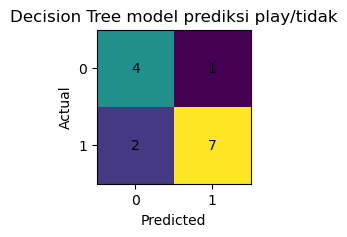

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.88      0.78      0.82         9

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



In [ ]:
# evaluasi model
y_pred = model_tree.predict(X)
cm = confusion_matrix(y, y_pred)
drawConfusionMatrix(cm, 2, "Decision Tree model prediksi play/tidak")
print(classification_report(y, y_pred))

In [ ]:
# optional - membuat visualisasi Decision Tree

# dot_data = StringIO()
# tree.export_graphviz(
#     model_tree,
#     out_file=dot_data,
#     class_names=['tidak', 'play'],
#     feature_names=['weather', 'temp'],
#     filled=True,
#     rounded=True,
#     special_characters=True
# )
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

note - graphviz belum berhasil terinstall dengan baik, jadi visualisasi decision tree pending

## Random Forest
random forest membangun diatas Decision Tree

Decision Tree = 1 pohon

Random Forest = banyak pohon, banyak decision tree (300+ pohon menjadi hutan)

setiap membuat prediksi dengan model random forest, kita voting dari total decision yang dibuat setiap pohon. misalkan ada 300 decision tree, dan 205 bilang data ini kategori 0, sisanya 95 bilang kategori 1, maka kita ambil hasil prediksi kategori 0.

In [ ]:
# menggunakan data sama weather, temp, play

df_en.head()

,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1


In [ ]:
# pisahin data menjadi fitur dan target

X = df_en[['weather', 'temp']]
y = df_en['play']

In [ ]:
# buat model
model_rf = RandomForestClassifier()
model_rf.fit(X, y)

RandomForestClassifier()

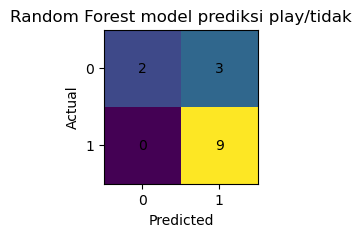

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



In [ ]:
# evaluasi model
y_pred = model_rf.predict(X)
cm = confusion_matrix(y, y_pred)
drawConfusionMatrix(cm, 2, "Random Forest model prediksi play/tidak")
print(classification_report(y, y_pred))

kita coba build model Decision Tree dan Random Forest menggunakan data Stroke. Nanti hasil evaluasi nya kita bandingkan juga dengan model Naive Bayes.

In [ ]:
# siapkan data

df_stroke2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# pisahin fitur dan target

X = df_stroke2[['age', 'hypertension', 'avg_glucose_level', 'bmi']]
y = df_stroke2['stroke']

In [ ]:
# pisahin menjadi training dan testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

print(X_train.shape, X_test.shape)
print(len(y_train), len(y_test))

(3681, 4) (1228, 4)
3681 1228


In [ ]:
# latih model
model_tree_stroke = DecisionTreeClassifier(max_depth=20)
model_tree_stroke.fit(X_train, y_train)

model_randomforest_stroke = RandomForestClassifier(max_depth=20)
model_randomforest_stroke.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

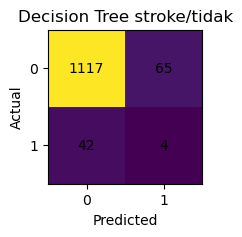

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1182
           1       0.06      0.09      0.07        46

    accuracy                           0.91      1228
   macro avg       0.51      0.52      0.51      1228
weighted avg       0.93      0.91      0.92      1228



In [ ]:
# evaluasi model

# Decision Tree
y_pred = model_tree_stroke.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
drawConfusionMatrix(cm, 2, "Decision Tree stroke/tidak")
print(classification_report(y_test, y_pred))

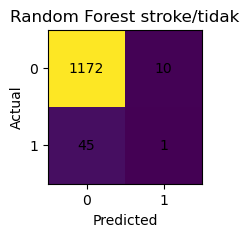

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1182
           1       0.09      0.02      0.04        46

    accuracy                           0.96      1228
   macro avg       0.53      0.51      0.51      1228
weighted avg       0.93      0.96      0.94      1228



In [ ]:
# Random Forest
y_pred = model_randomforest_stroke.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
drawConfusionMatrix(cm, 2, "Random Forest stroke/tidak")
print(classification_report(y_test, y_pred))

bisa dilihat dari hasil evaluasi diatas, dimana kategori 1 mendapatkan precision recoll 0, kalau model tipe random forest tidak cocok untuk memprediksi stroke/tidak. Kita bisa coba tuning lebih lanjut, atau menambahkan langkah data preparation baru membuat model lagi. Untuk sekarang, model ini kurang berguna karena hanya akan memprediksi 1 kategori dari 2 kategori.

## Feature Importance
Satu kelebihan model Random Forest adalah kemampuan untuk mengetahui fitur mana yang penting.

Model random forest dari sklearn punya variable feature_importance yang memberi tahu kita, setiap fitur, seberapa berpengaruh ke klasifikasi target.

Dari sana, fitur2 yang tidak berpengaruh bisa kita hapus.

In [ ]:
fi = model_randomforest_stroke.feature_importances_
fi

array([0.24338159, 0.03087262, 0.39259401, 0.33315178])

In [ ]:
# masih ingat fitur apa saja yang kita gunakan?
X.head()

,age,hypertension,avg_glucose_level,bmi
0,67.0,0,228.69,36.6
2,80.0,0,105.92,32.5
3,49.0,0,171.23,34.4
4,79.0,1,174.12,24.0
5,81.0,0,186.21,29.0


In [ ]:
judul_fitur = X.columns
judul_fitur

Index(['age', 'hypertension', 'avg_glucose_level', 'bmi'], dtype='object')

In [ ]:
pd.DataFrame(
    index=judul_fitur,
    data=fi,
    columns=['Importance']
  ).sort_values("Importance")

,Importance
hypertension,0.030873
age,0.243382
bmi,0.333152
avg_glucose_level,0.392594


dari feature_importances_ kita mendapat informasi kalau, fitur "hypertension" memiliki pengaruh 2.86% ke apakah sebuah data masuk kategori stroke/ sehat.

kita bisa menghilangkan fitur ini dengan harapan model bisa dilatih lebih cepat dan hasilnya lebih akurat.

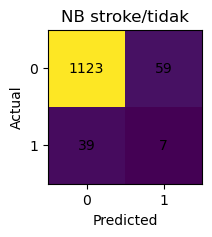

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1182
           1       0.11      0.15      0.12        46

    accuracy                           0.92      1228
   macro avg       0.54      0.55      0.54      1228
weighted avg       0.93      0.92      0.93      1228



In [ ]:
# contoh
# kita buat ulang model random forest dengan 3 fitur saja: age bmi glucose

# siapkan fitur dan target
X = df_stroke2[['age', 'bmi', 'avg_glucose_level']]
y = df_stroke2['stroke']

# pisahin menjadi training dan testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

# latih model
model_nb_stroke = GaussianNB()
model_nb_stroke.fit(X_train, y_train)

# evaluasi model
y_pred = model_nb_stroke.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
drawConfusionMatrix(cm, 2, "NB stroke/tidak")
print(classification_report(y_test, y_pred))

walaupun kita sudah menghilangkan fitur yang paling tidak berpengaruh, hasil model tetap tidak akurat, karena datanya memang berat sebelah (1182 kategori 0, 46 kategori 1) dan harusnya hal yang sama juga terjadi di training datanya. training data yang berat sebelah seperti ini umumnya membuat model condong memprediksi yang kategorinya banyak.

## Support Vector Machine

model SVM sebenarnya menggunakan kedua teknik, regression dan classification. dan sebenarnya bisa digunakan untuk kedua jenis permasalahan. hanya dia lebih umum digunakan untuk klasifikasi.

konsepnya SVM:
- memisahkan data (dengan garis regression) setelah di plot ke grafik (seperti KNN)
- garis pemisah terbaik akan memiliki margin tertinggi. margin adalah jarak antara kategori 0 dan kategori 1, jarak antara titik data terdekat dari setiap kelompok ke garis pemisah kita.

magic nya SVM:
- kalau datanya tidak bisa dipisah oleh garis lurus, maka kita bisa tambahkan dimensi ke datanya sampai bisa dipisahkan oleh garis lurus.
- kita gunakan "kernel" untuk memisahkan data dan menambahkan dimensi

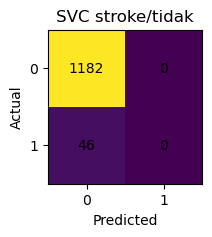

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1182
           1       0.00      0.00      0.00        46

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.93      0.96      0.94      1228



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# siapkan fitur dan target
X = df_stroke2[['age', 'bmi', 'avg_glucose_level']]
y = df_stroke2['stroke']

# pisahin menjadi training dan testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

# latih model
model_svc_stroke = SVC(kernel='rbf')
model_svc_stroke.fit(X_train, y_train)

# evaluasi model
y_pred = model_svc_stroke.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
drawConfusionMatrix(cm, 2, "SVC stroke/tidak")
print(classification_report(y_test, y_pred))

# Latihan

gunakan dataset berikut https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv

buatlah model machine learning classification untuk memprediksi `Loan_Status`

gunakan model yang sudah dipelajari:
- logistic regression
- knn
- naive bayes
- decision tree
- random forest
- svm

gunakan juga teknik persiapan data yang sudah dipelajari:
- missing values
- encoding (jika perlu)
- split train dan test data

coba buat model yang bisa memprediksi Loan_Status dengan paling akurat. dan coba juga gunakan fitur fitur yang paling berpengaruh.

In [ ]:
# load data

df_loan = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv")
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# explore data
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# remove missing values
df_loan2 = df_loan.dropna()
df_loan2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [ ]:
# melihat ada berapa jenis Loan_Status
df_loan2['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [ ]:
# kita gunakan gender, married/tidak, dependents, education, self_employed untuk memprediksi loan_status
X = df_loan2[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']]
y = df_loan2['Loan_Status']

display(X.head())
print(y[:5])

,Gender,Married,Dependents,Education,Self_Employed
1,Male,Yes,1,Graduate,No
2,Male,Yes,0,Graduate,Yes
3,Male,Yes,0,Not Graduate,No
4,Male,No,0,Graduate,No
5,Male,Yes,2,Graduate,Yes


1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object


In [ ]:
# encoding
le = LabelEncoder()

X_en = X.copy()

for col in X.columns:
    # fit data satu kolom dari data awal
    le.fit(X[col])
    # lihat classes kolom ini apa saja
    print(col, le.classes_)
    # ubah data jadi versi numerik dengan encoding, simpan ke dataframe lain
    X_en[col] = le.transform(X[col])

display(X_en.head())

le.fit(y)
print("loan_status", le.classes_)
y_en = le.transform(y)
print(y_en[:5])


Gender ['Female' 'Male']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']


,Gender,Married,Dependents,Education,Self_Employed
1,1,1,1,0,0
2,1,1,0,0,1
3,1,1,0,1,0
4,1,0,0,0,0
5,1,1,2,0,1


loan_status ['N' 'Y']
[0 1 1 1 1]


In [ ]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape)

(384, 5) (96, 5)


In [ ]:
pd.DataFrame(y_train).value_counts()

1    271
0    113
Name: count, dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

1    61
0    35
Name: count, dtype: int64

In [ ]:
# pembuatan model

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

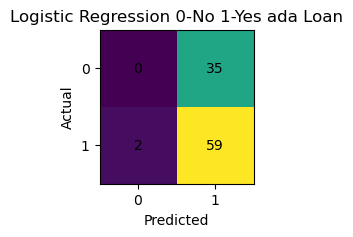

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.63      0.97      0.76        61

    accuracy                           0.61        96
   macro avg       0.31      0.48      0.38        96
weighted avg       0.40      0.61      0.48        96



In [ ]:
# evaluasi

# Logistic Regression
y_pred = model_lr.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, y_pred), 2, "Logistic Regression 0-No 1-Yes ada Loan")
print(classification_report(y_test, y_pred))

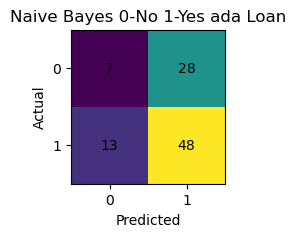

              precision    recall  f1-score   support

           0       0.35      0.20      0.25        35
           1       0.63      0.79      0.70        61

    accuracy                           0.57        96
   macro avg       0.49      0.49      0.48        96
weighted avg       0.53      0.57      0.54        96



In [ ]:
# Naive Bayes
y_pred = model_nb.predict(X_test)
drawConfusionMatrix(confusion_matrix(y_test, y_pred), 2, "Naive Bayes 0-No 1-Yes ada Loan")
print(classification_report(y_test, y_pred))